In [37]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2

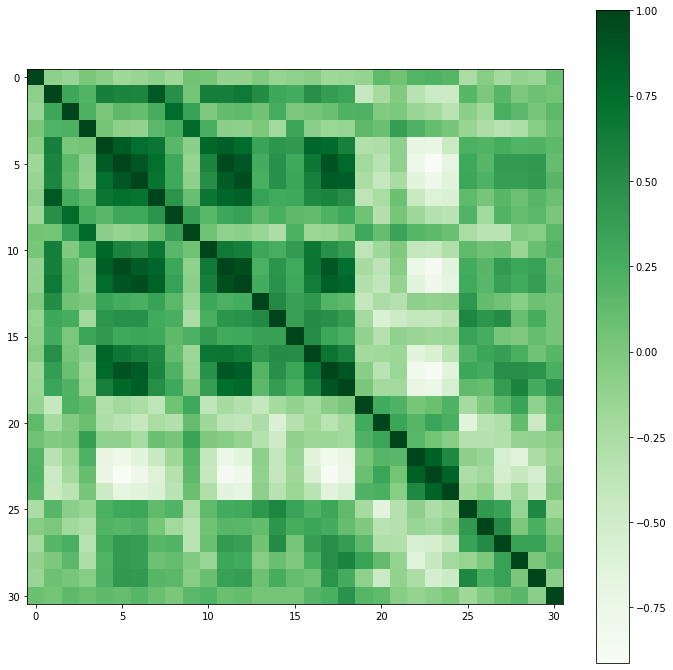

In [3]:
data = genfromtxt('SoyabeanData.csv', delimiter=';', skip_header=0)
Features = data[1:,2:]
plt.figure(figsize=(12,12))
Correlation = plt.imshow(np.corrcoef(Features.T), cmap='Greens')
plt.colorbar()

In [4]:
Yield_Correlation = np.corrcoef(Features.T)[:,0]
Yield_Correlation

array([ 1.        , -0.09314829, -0.14671264,  0.00880701, -0.07329484,
       -0.18617741, -0.14576401, -0.09096856, -0.18943152,  0.04684002,
        0.01854406, -0.12577756, -0.11901319, -0.03154166, -0.13628161,
       -0.10308494, -0.06343669, -0.18874954, -0.15923493, -0.12938977,
        0.13709344,  0.0557078 ,  0.19191537,  0.21250472,  0.18340554,
       -0.24779908, -0.06649069, -0.21649411, -0.11483692, -0.15062831,
        0.07731648])

In [25]:
data_2 = genfromtxt('SoyabeanData_2.csv', delimiter=';', skip_header=0)
Features_2 = data_2[1:,2:]

data_3 = genfromtxt('SoyabeanData_3.csv', delimiter=';', skip_header=0)
Features_3 = data_3[1:,2:]

Yield_Correlation_2 = np.corrcoef(Features_2.T)[:,0]
Yield_Correlation_3 = np.corrcoef(Features_3.T)[:,0]

print('Correlation between the yield of year N and the yield of year N-1 :', Yield_Correlation_2[31])
print('Correlation between the yield of year N and the yield of year N-2 :', Yield_Correlation_3[32])

Correlation between the yield of year N and the yield of year N-1 : 0.07614033174525343
Correlation between the yield of year N and the yield of year N-2 : 0.25768132879586003


# Advanced Method : VarianceThreshold

In [35]:
yields = pd.read_csv('SoyabeanData.csv', sep=";", header=0)
yields = yields.drop(['DISTRICTS', 'YIELD'], axis=1)
yields.var(axis=0)

YEAR         8.267974
NDVI_JUN     0.004059
NDVI_JUL     0.009381
NDVI_AUG     0.006068
NDVI_SEP     0.006267
NDVI_OCT     0.010046
NDVI_NOV     0.005402
LAI_JUN      0.036225
LAI_JUL      0.047236
LAI_AUG      0.084155
LAI_SEP      0.138861
LAI_OCT      0.230525
LAI_NOV      0.101816
ET_JUN       2.901293
ET_JUL      38.388674
ET_AUG      11.158323
ET_SEP      27.609512
ET_OCT      34.614512
ET_NOV      13.258298
LST_JUN      4.002001
LST_JUL     13.476816
LST_AUG      6.517392
LST_SEP      3.754824
LST_OCT      9.170809
LST_NOV      4.415942
RF_JUN       8.235071
RF_JUL      16.119900
RF_AUG      17.227471
RF_SEP      14.577022
RF_OCT       0.871853
RF_NOV       0.071394
dtype: float64

In [36]:
selector = VarianceThreshold(threshold = 1)
selector.fit_transform(yields)
selector.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False])

# Advanced Methode : Chi square

In [51]:
yields_2 = pd.read_csv('SoyabeanData.csv', sep=";", header=0)
y = yields_2[["YIELD"]]     
X = yields_2.drop(['YIELD', 'DISTRICTS'], axis=1)

In [52]:
y.describe()

,YIELD
count,460.000000
mean,0.970943
std,0.405149
min,0.000000
25%,0.661290
50%,0.935442
75%,1.272727
max,2.488515


In [58]:
X

,YEAR,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,LAI_AUG,...,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV
0,2010,0.267127,0.422869,0.549074,0.635475,0.590291,0.499968,0.476485,0.566221,1.180546,...,303.4592,302.5775,303.1825,302.7825,3.680000,13.399120,9.782032,8.332526,1.451772,0.177238
1,2010,0.204788,0.442124,0.636819,0.504908,0.363624,0.374139,0.271169,0.553859,1.567092,...,301.6130,305.5819,309.4097,305.8609,0.799692,12.214660,8.286234,6.260466,0.267456,0.831193
2,2010,0.474099,0.370348,0.622812,0.761317,0.681799,0.646178,1.010184,0.666346,1.249341,...,300.4666,301.0198,301.0755,300.5775,4.437671,16.387600,16.124900,12.959230,1.698881,0.560686
3,2010,0.245248,0.338928,0.472167,0.560045,0.451814,0.437550,0.250737,0.489577,0.774511,...,299.5726,305.0602,308.8047,306.8003,4.333467,7.529426,10.633870,5.368312,1.044433,1.204902
4,2010,0.363338,0.340311,0.536145,0.647831,0.564620,0.577530,0.615970,0.651014,0.991651,...,301.5153,303.1102,304.5974,302.6561,4.536366,15.414000,17.074730,9.245907,1.085629,1.406991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2019,0.312520,0.467670,0.586603,0.650060,0.632386,0.571918,0.581963,0.729820,1.140528,...,303.0883,301.6729,301.8490,301.0930,2.785274,11.660380,10.777380,11.194950,0.824073,0.121162
456,2019,0.270131,0.468039,0.534768,0.545095,0.501188,0.396876,0.335503,0.487304,1.126526,...,302.1456,300.9986,305.0228,304.3641,1.979300,10.401330,15.542950,13.710500,1.080869,0.265000
457,2019,0.238206,0.446219,0.441294,0.426055,0.435659,0.435719,0.231742,0.702879,1.065454,...,299.1196,300.8408,305.9274,305.1380,4.307035,11.775490,14.682700,19.515720,1.358897,0.260085
458,2019,0.378619,0.539210,0.548349,0.643044,0.698606,0.610965,0.823617,1.030752,1.134050,...,301.6267,301.2321,301.7070,301.1878,3.357156,12.994140,16.127260,13.355350,0.462034,0.115618


In [53]:
def test(yields):  
    if yields <= 0.935442:
        return 'bad year'
    else:
        return 'good year'

In [54]:
y["YIELD"] = y['YIELD'].map(test)

C:\Users\tompo\AppData\Local\Temp\ipykernel_17896\891516931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["YIELD"] = y['YIELD'].map(test)


In [55]:
chi2(X, y)

(array([3.57451952e-02, 9.43241726e-02, 2.81438136e-01, 3.24783757e-03,
        2.15335647e-02, 2.39395923e-01, 8.10300254e-02, 4.36225661e-01,
        7.99976456e-01, 8.49186919e-02, 1.20865705e-04, 1.06966644e+00,
        5.80976106e-01, 7.76615173e-01, 1.63426505e+01, 3.47373844e+00,
        3.82052707e+00, 2.75691197e+01, 1.33344381e+01, 5.95825269e-02,
        1.41308685e-01, 3.65417067e-03, 1.70683582e-01, 4.34607129e-01,
        2.00431310e-01, 2.15195388e+01, 3.39356444e+00, 3.43825663e+01,
        1.05913328e+01, 2.35121779e+00, 1.19667136e+00]),
 array([8.50042658e-01, 7.58750203e-01, 5.95760157e-01, 9.54553319e-01,
        8.83334724e-01, 6.24642752e-01, 7.75906375e-01, 5.08949817e-01,
        3.71100409e-01, 7.70739206e-01, 9.91228318e-01, 3.01020801e-01,
        4.45929973e-01, 3.78178343e-01, 5.28607585e-05, 6.23502481e-02,
        5.06283098e-02, 1.51579543e-07, 2.60576069e-04, 8.07156994e-01,
        7.06983453e-01, 9.51797447e-01, 6.79505000e-01, 5.09736916e-01,
      

In [64]:
selector = SelectKBest(chi2, k=8)
selector.fit_transform(X, y)
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False])